<a href="https://colab.research.google.com/github/thallyson1997/iris/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carregar pacotes

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Carregar dados

In [ ]:
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#Invesigar os dados

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


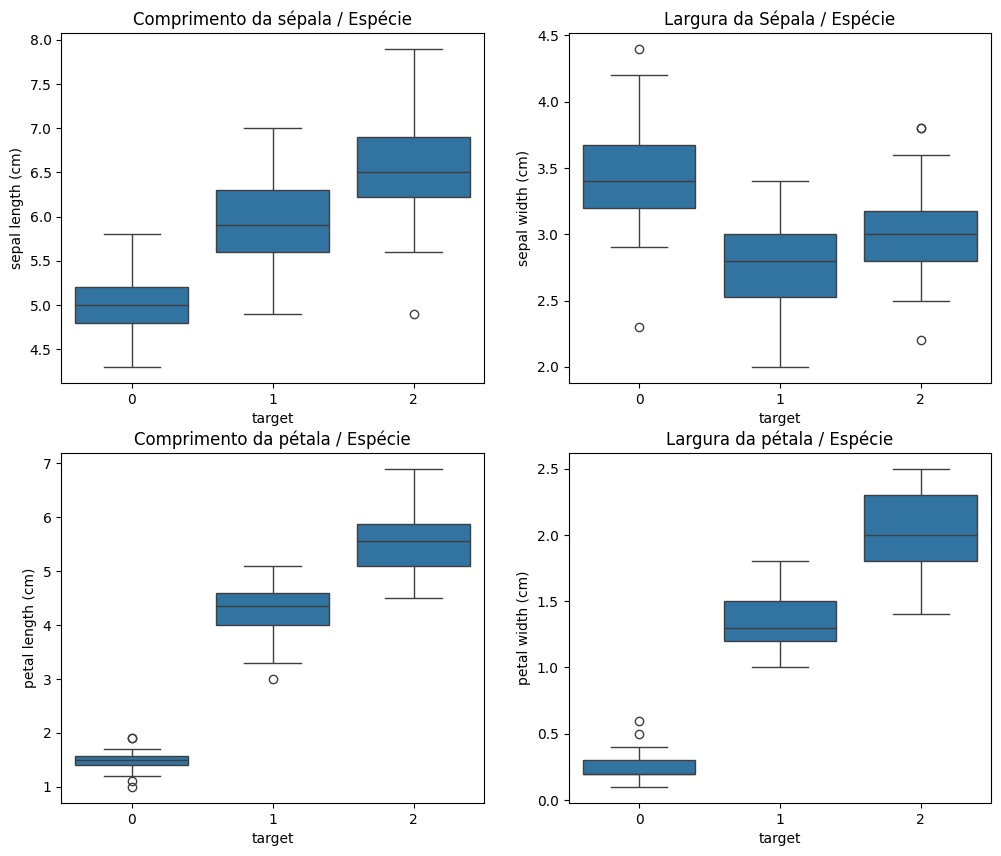

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(data=df, y='sepal length (cm)', x='target', ax=axes[0,0])
axes[0, 0].set_title("Comprimento da sépala / Espécie")
sns.boxplot(data=df, y='sepal width (cm)', x='target', ax=axes[0,1])
axes[0, 1].set_title("Largura da Sépala / Espécie")
sns.boxplot(data=df, y='petal length (cm)', x='target', ax=axes[1,0])
axes[1, 0].set_title("Comprimento da pétala / Espécie")
sns.boxplot(data=df, y='petal width (cm)', x='target', ax=axes[1,1])
axes[1, 1].set_title("Largura da pétala / Espécie")

plt.show()

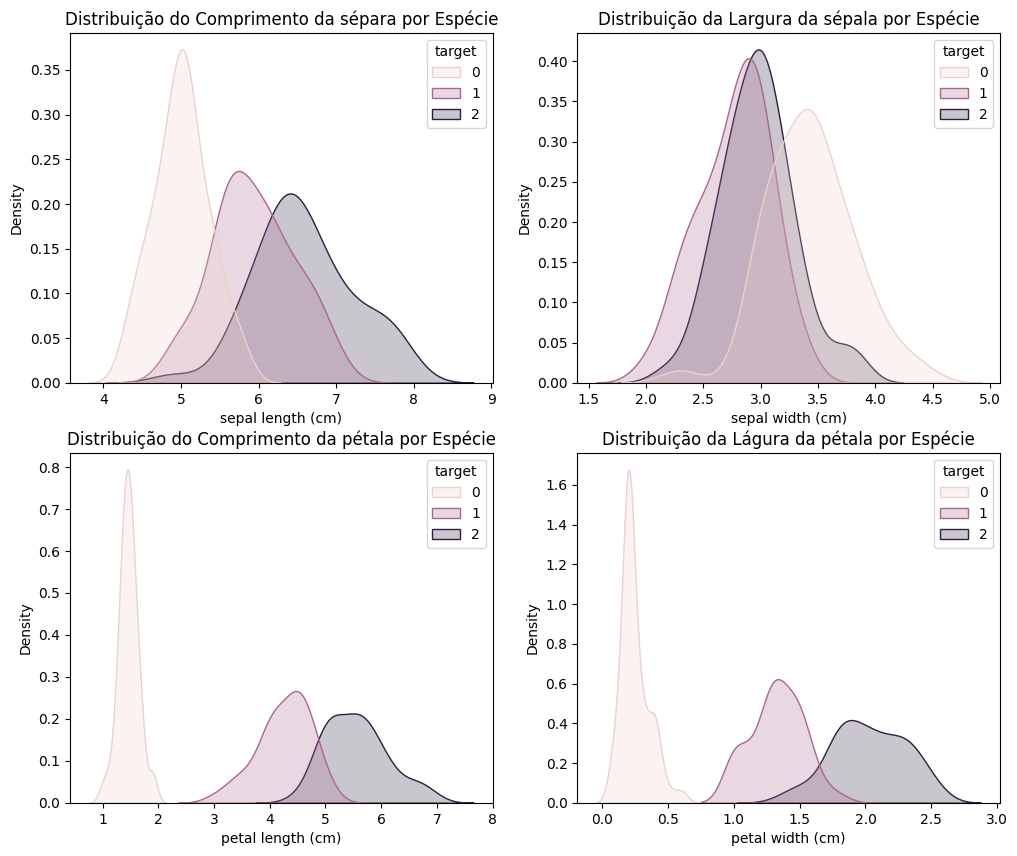

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.kdeplot(data=df, x='sepal length (cm)', hue='target', fill=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribuição do Comprimento da sépara por Espécie")

sns.kdeplot(data=df, x='sepal width (cm)', hue='target', fill=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribuição da Largura da sépala por Espécie")

sns.kdeplot(data=df, x='petal length (cm)', hue='target', fill=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribuição do Comprimento da pétala por Espécie")

sns.kdeplot(data=df, x='petal width (cm)', hue='target', fill=True, ax=axes[1, 1])
axes[1, 1].set_title("Distribuição da Lágura da pétala por Espécie")

plt.show()

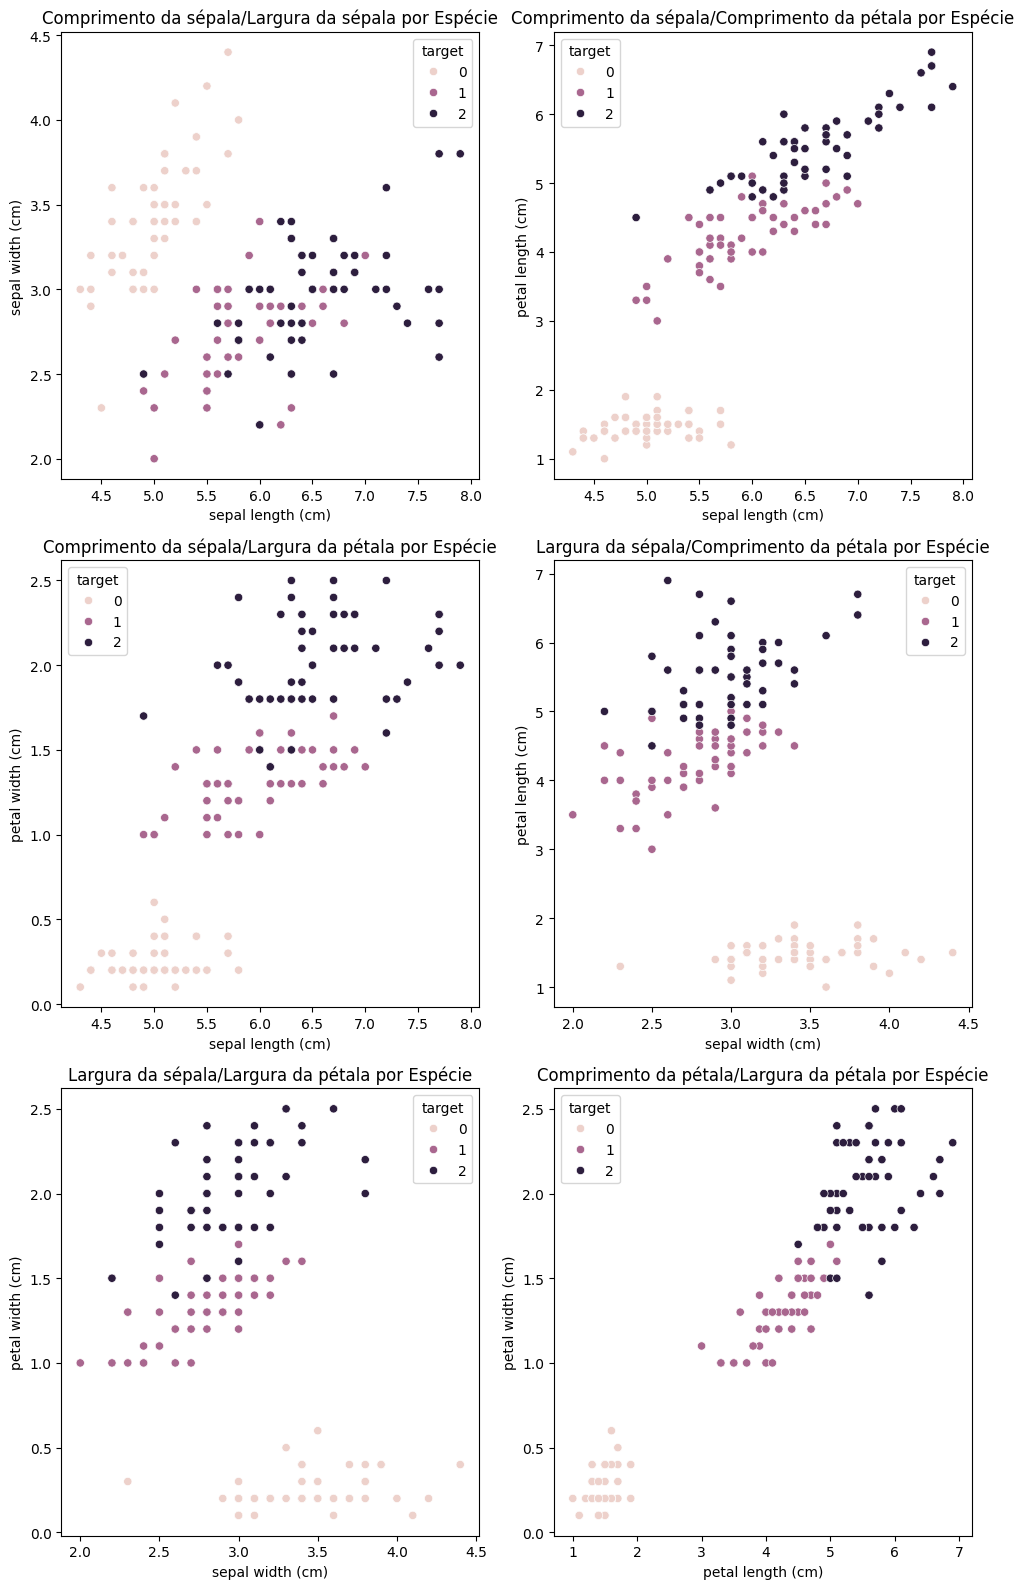

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(10, 16))

sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='target', ax=axes[0,0])
axes[0, 0].set_title("Comprimento da sépala/Largura da sépala por Espécie")

sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='target', ax=axes[0,1])
axes[0, 1].set_title("Comprimento da sépala/Comprimento da pétala por Espécie")

sns.scatterplot(data=df, x='sepal length (cm)', y='petal width (cm)', hue='target', ax=axes[1,0])
axes[1, 0].set_title("Comprimento da sépala/Largura da pétala por Espécie")

sns.scatterplot(data=df, x='sepal width (cm)', y='petal length (cm)', hue='target', ax=axes[1,1])
axes[1, 1].set_title("Largura da sépala/Comprimento da pétala por Espécie")

sns.scatterplot(data=df, x='sepal width (cm)', y='petal width (cm)', hue='target', ax=axes[2,0])
axes[2, 0].set_title("Largura da sépala/Largura da pétala por Espécie")

sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='target', ax=axes[2,1])
axes[2, 1].set_title("Comprimento da pétala/Largura da pétala por Espécie")

plt.tight_layout()
plt.show()

#Dividir dados de treinamento e teste

In [ ]:
X = df.drop(columns='target')
y = df.target

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Treinamento

## Naive Bayes

In [ ]:
modelo_nb = MultinomialNB()

modelo_nb.fit(X_treino, y_treino)

y_pred = modelo_nb.predict(X_treino)

In [ ]:
print('Acurácia: ', accuracy_score(y_treino, y_pred))

Acurácia:  0.95


## Máquina Vetor de Suporte

In [ ]:
modelo_sv = SVC()

modelo_sv.fit(X_treino, y_treino)

y_pred = modelo_sv.predict(X_treino)

In [ ]:
print('Acurácia: ', accuracy_score(y_treino, y_pred))

Acurácia:  0.9833333333333333


## Floresta Aleatória

In [ ]:
modelo_rf = RandomForestClassifier()

modelo_rf.fit(X_treino, y_treino)

y_pred = modelo_rf.predict(X_treino)

In [ ]:
print('Acurácia: ', accuracy_score(y_treino, y_pred))

Acurácia:  1.0


# Testando o modelo

In [ ]:
y_pred1 = modelo_nb.predict(X_teste)
print('Acurácia Naive Bayes: ', accuracy_score(y_teste, y_pred1), '\n')

y_pred2 = modelo_sv.predict(X_teste)
print('Acurácia Máquina Vetor de Suporte: ', accuracy_score(y_teste, y_pred2), '\n')

y_pred3 = modelo_rf.predict(X_teste)
print('Acurácia Floresta Aleatória: ', accuracy_score(y_teste, y_pred3), '\n')

Acurácia Naive Bayes:  1.0 

Acurácia Máquina Vetor de Suporte:  0.9666666666666667 

Acurácia Floresta Aleatória:  0.9666666666666667 



In [ ]:
print('Matriz de Confusão - Naive Bayes')
confusion_matrix(y_teste, y_pred1)

Matriz de Confusão - Naive Bayes


array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]])